<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 05 Prediction 1 - Random Forest

### Riccardo Spolaor (864877)

</center>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import python_files.ValidationOperations as valop

In [2]:
dataframe = pd.read_csv('./datasets/dataframe03.csv', low_memory = False)

In [3]:
dataframe.head(10)

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,...,Isner J.A,Isner J.B,Moya C.A,Moya C.B,Davydenko N.A,Davydenko N.B,Gonzalez F.A,Gonzalez F.B,OtherA,OtherB
0,0,0,1.0,2,0,0,1,0,3.0,18.0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,1.0,2,0,0,1,0,3.0,442.0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1.0,2,0,0,1,0,3.0,23.0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1.0,2,0,0,1,0,3.0,69.0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,1.0,2,0,0,1,0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,1.0,2,0,0,1,0,3.0,99.0,...,0,0,0,0,0,0,0,0,1,1
6,0,0,1.0,2,0,0,1,0,3.0,91.0,...,0,0,0,0,0,0,0,0,1,1
7,1,0,1.0,2,0,0,1,0,3.0,67.0,...,0,0,0,0,0,0,0,0,1,1
8,0,0,1.0,2,0,0,1,0,3.0,79.0,...,0,0,0,0,0,0,0,0,1,1
9,1,0,1.0,2,0,0,1,0,3.0,95.0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'RankA', 'RankFilledA', 'RankB',
       'RankFilledB', 'PtsA', 'PtsFilledA', 'PtsB', 'PtsFilledB', 'MaxA',
       'MaxFilledA', 'MaxB', 'MaxFilledB', 'AvgA', 'AvgFilledA', 'AvgB',
       'AvgFilledB', 'Carpet', 'Clay', 'Grass', 'Hard', 'Federer R.A',
       'Federer R.B', 'Nadal R.A', 'Nadal R.B', 'Djokovic N.A',
       'Djokovic N.B', 'Murray A.A', 'Murray A.B', 'Roddick A.A',
       'Roddick A.B', 'Ferrer D.A', 'Ferrer D.B', 'Berdych T.A',
       'Berdych T.B', 'Hewitt L.A', 'Hewitt L.B', 'Del Potro J.M.A',
       'Del Potro J.M.B', 'Tsonga J.W.A', 'Tsonga J.W.B', 'Cilic M.A',
       'Cilic M.B', 'Wawrinka S.A', 'Wawrinka S.B', 'Gasquet R.A',
       'Gasquet R.B', 'Nishikori K.A', 'Nishikori K.B', 'Monfils G.A',
       'Monfils G.B', 'Ferrero J.C.A', 'Ferrero J.C.B', 'Robredo T.A',
       'Robredo T.B', 'Nalbandian D.A', 'Nalbandian D.B', 'Raonic M.A',
       'Raonic M.B', 'Agassi

In [33]:
'''
# Vedo similarità tra giocatori che hanno partecipato all' Aus open 2019 rispetto ai giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)
# Riproporre alla fine, quando dataframe è completo e validare il fatto di droppare righe in base ad accuracy

players2019 = set(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerA'].append(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerB']).unique())
print(type(players2019))
for i in range(0,int(max(dataframe['csvID']))) :
    players = set(dataframe[dataframe['csvID'] == i]['PlayerA'].append(dataframe[dataframe['csvID'] == i]['PlayerB']).unique())
    print ('Jaccard ', i + 2001, ': ', len(players2019 & players) / len( players2019 | players))
    
# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo
# Prendo
'''

"\n# Vedo similarità tra giocatori che hanno partecipato all' Aus open 2019 rispetto ai giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)\n# Riproporre alla fine, quando dataframe è completo e validare il fatto di droppare righe in base ad accuracy\n\nplayers2019 = set(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerA'].append(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerB']).unique())\nprint(type(players2019))\nfor i in range(0,int(max(dataframe['csvID']))) :\n    players = set(dataframe[dataframe['csvID'] == i]['PlayerA'].append(dataframe[dataframe['csvID'] == i]['PlayerB']).unique())\n    print ('Jaccard ', i + 2001, ': ', len(players2019 & players) / len( players2019 | players))\n    \n# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo\n# Prendo\n"

In [34]:
#dataframe.drop(['PlayerA', 'PlayerB'], axis = 1, inplace = True)

In [35]:
'''
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def get_best_dataframe_split (index, df): 
    print(df.shape)
    print('csvID deleted up to: ', index)

    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    accuracies_valid = []
    accuracies_test = []
    
    for i in range(30,31,2):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies_valid += [valid_acc]
    print ("\t Mean Validation Accuracy: {:.3f}".format(
        np.mean(accuracies_valid)) )
    

cutDataframes = [dataframe.drop(dataframe[dataframe['csvID'].isin(range(0, i))].index.values, axis =0) 
                 for i in range(0, int(max(dataframe['csvID'])))]

for i, df in enumerate(cutDataframes):
    get_best_dataframe_split (i, df)
    
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import tree\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.ensemble import RandomForestClassifier\n\ndef get_best_dataframe_split (index, df): \n    print(df.shape)\n    print(\'csvID deleted up to: \', index)\n\n    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != \'Winner\'],  \n                                                        dataframe[\'Winner\'], test_size=0.33, shuffle = False, stratify=None)\n    accuracies_valid = []\n    accuracies_test = []\n    \n    for i in range(30,31,2):\n        rf = RandomForestClassifier(n_estimators=i)\n        rf.fit(X_train,y_train)\n\n        # compute Accuracy\n        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))\n        accuracies_valid += [valid_acc]\n    print ("\t Mean Validation Accuracy: {:.3f}".format(\n        np.mean(accuracies_valid)) )\n    \n\ncutDataframes = [dataframe.drop(data

In [36]:
#dataframe = dataframe[dataframe['csvID'] > 16]

In [37]:
#dataframe.columns.values

In [38]:
dataframe.describe()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,...,Isner J.A,Isner J.B,Moya C.A,Moya C.B,Davydenko N.A,Davydenko N.B,Gonzalez F.A,Gonzalez F.B,OtherA,OtherB
count,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.00000,51945.000000,51945.000000,...,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000
mean,0.499990,8.780017,33.145288,55.134662,7.111098,1.328463,0.822447,1.43084,3.374280,76.034958,...,0.006237,0.006237,0.005275,0.004582,0.007623,0.007585,0.005217,0.004543,0.820137,0.821946
std,0.500005,5.497453,18.079233,28.209598,9.661308,1.497969,0.382140,2.01872,0.780056,107.370202,...,0.078731,0.078731,0.072437,0.067534,0.086980,0.086762,0.072041,0.067251,0.384077,0.382562
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,19.000000,34.000000,0.000000,0.000000,1.000000,0.00000,3.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,9.000000,33.000000,56.000000,0.000000,1.000000,1.000000,1.00000,3.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,14.000000,49.000000,74.000000,16.000000,2.000000,1.000000,2.00000,3.000000,92.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,18.000000,69.000000,107.000000,25.000000,4.000000,1.000000,7.00000,5.000000,2161.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


"\nfrom sklearn.utils import resample\nfrom sklearn.tree import DecisionTreeClassifier\n\n\nN_TESTS = 20\n\nstats = np.array([])\n\nX_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  \n                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)\n\nn_inst = range(2,100,5)\nfor n in n_inst:\n    y_preds = np.array([])\n    \n    for i in range(N_TESTS):\n        Xs, ys = resample(X_train,y_train, n_samples=n)\n\n        # train a decision tree classifier\n        dt = DecisionTreeClassifier(max_leaf_nodes=20)\n        dt.fit(Xs,ys)\n        \n        y_pred = dt.predict(X_valid)\n        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred\n\n    dt_bias     = (y_valid-np.mean(y_preds,axis=1))**2\n    dt_variance = np.var(y_preds,axis=1)\n    dt_error    = (y_preds - y_valid.values.reshape(-1,1))**2\n    \n    run_stats = np.array([dt_error.mean(), d

In [40]:
'''
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

N_TESTS = 2

stats = np.array([])


X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)

boosts = range(2,100,10)
for l in boosts:
    y_preds = np.array([])
    
    for i in range(N_TESTS):
        Xs, ys = resample(X_train,y_train, n_samples=int(0.67*len(y_train)) )

        # train a decision tree classifier
        rf = RandomForestClassifier(n_estimators=l, n_jobs = -1)
        rf.fit(Xs,ys)
        
        y_pred = rf.predict(X_valid)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

    dt_bias     = (y_valid-np.mean(y_preds,axis=1))**2
    dt_variance = np.var(y_preds,axis=1)
    dt_error    = (y_preds - y_valid.values.reshape(-1,1))**2

    
    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    
    stats = np.column_stack( [stats, run_stats]) if stats.size else run_stats
    
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(boosts,stats[0,:], 'o:', label='Error')
ax.plot(boosts,stats[1,:], 'o:', label='Bias$^2$')
ax.plot(boosts,stats[2,:], 'o:', label='Variance')
ax.set_xlabel('Number of Trees')
ax.grid()
ax.legend()

print (stats[:,-1])
'''

"\nfrom sklearn.utils import resample\nfrom sklearn.ensemble import RandomForestClassifier\n\nN_TESTS = 2\n\nstats = np.array([])\n\n\nX_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  \n                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)\n\nboosts = range(2,100,10)\nfor l in boosts:\n    y_preds = np.array([])\n    \n    for i in range(N_TESTS):\n        Xs, ys = resample(X_train,y_train, n_samples=int(0.67*len(y_train)) )\n\n        # train a decision tree classifier\n        rf = RandomForestClassifier(n_estimators=l, n_jobs = -1)\n        rf.fit(Xs,ys)\n        \n        y_pred = rf.predict(X_valid)\n        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred\n\n    dt_bias     = (y_valid-np.mean(y_preds,axis=1))**2\n    dt_variance = np.var(y_preds,axis=1)\n    dt_error    = (y_preds - y_valid.values.reshape(-1,1))**2\n\n    \n    ru

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def get_best_dataframe_split (index, df): 
    #print(df.shape)
    #print('csvID deleted up to: ', index)

    X_train, X_valid, y_train, y_valid = train_test_split(df.loc[:, df.columns != 'Winner'],  
                                                        df['Winner'], test_size=0.33, shuffle = False, stratify=None)
    accuracies = []
    
    for max_depth in range(2,20):

        dt = tree.DecisionTreeClassifier(max_depth = max_depth)

        dt.fit(X_train,y_train)

        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        
        accuracies += [[valid_acc, train_acc]]

    best_valid_accuracy, best_train_accuracy = max(accuracies)
    return [[index, best_train_accuracy, best_valid_accuracy]]


cutDataframes = [dataframe.drop(dataframe[dataframe['csvID'].isin(range(0, i))].index.values, axis =0) 
                 for i in range(0, int(max(dataframe['csvID'])))]
accuracies = []

for i, df in enumerate(cutDataframes):
    accuracies += get_best_dataframe_split (i, df)

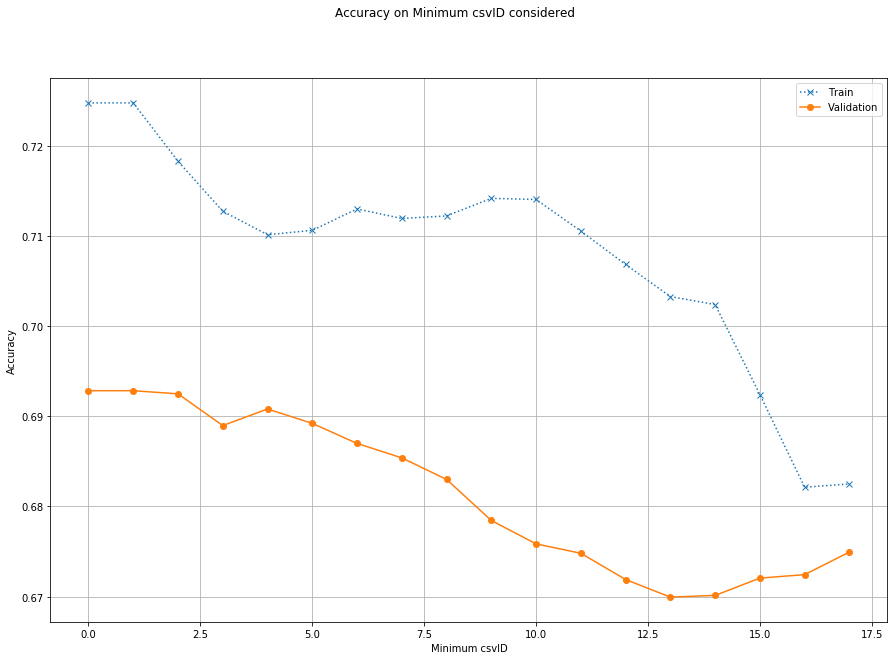

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_accuracies_by_csvID():
    npaccuracies = np.array(accuracies)

    fig, ax = plt.subplots(figsize = (15,10))
    fig.suptitle("Accuracy on Minimum csvID considered")
    ax.plot(npaccuracies[:,0], npaccuracies[:,1], "x:", label="Train")
    ax.plot(npaccuracies[:,0], npaccuracies[:,2], "o-", label="Validation")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Minimum csvID")
    ax.grid()
    ax.legend()
    
plot_accuracies_by_csvID()

In [53]:
dataframe = dataframe[dataframe['csvID'] >= max([i[::-1] for i in accuracies])[2]]
# Inverto liste e ottengo elemento maggiore in base a accuracy e restituisco posizione di index

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,...,Isner J.A,Isner J.B,Moya C.A,Moya C.B,Davydenko N.A,Davydenko N.B,Gonzalez F.A,Gonzalez F.B,OtherA,OtherB
2963,1,1,1.0,2,0,0,1,0,3.0,46.0,...,0,0,0,0,0,0,0,0,1,1
2964,0,1,1.0,2,0,0,1,0,3.0,153.0,...,0,0,0,0,0,0,0,0,1,1
2965,1,1,1.0,2,0,0,1,0,3.0,92.0,...,0,0,0,0,0,0,0,0,1,1
2966,0,1,1.0,2,0,0,1,0,3.0,221.0,...,0,0,0,0,0,0,0,0,1,1
2967,1,1,1.0,2,0,0,1,0,3.0,39.0,...,0,0,0,0,0,0,0,0,1,1


In [70]:
'''
def plot_estimator_accuracy(ax, accuracies, hyperparameter):
    accuracies = np.array(accuracies)
    ax.plot(accuracies[:,2], accuracies[:,1], "x:", label="Train")
    ax.plot(accuracies[:,2], accuracies[:,0], "o-", label="Validation")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel(hyperparameter)
    ax.grid()
    ax.legend()
'''

Best Max Depth: 6
Best Max Features: 64


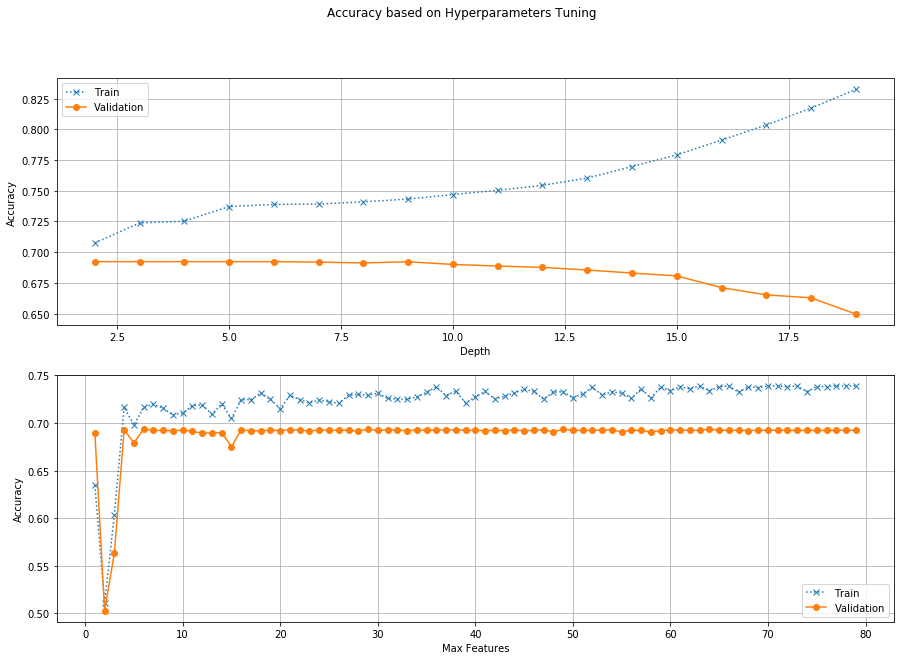

In [3]:
tree_best_features = valop.validate_tree_classifier(dataframe)

In [4]:
'''
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

def tune_tree_depth(ax):
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                              dataframe['Winner'], 
                                                              test_size = 0.33, 
                                                              stratify = None, shuffle = False)

    accuracies = []

    for max_depth in range(2,20):

        dt = tree.DecisionTreeClassifier(max_depth = max_depth)

        dt.fit(X_train,y_train)

        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        #print ("Depth: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} ".format(
        #    max_depth,  train_acc, valid_acc))

        accuracies += [[valid_acc, train_acc, max_depth]]
        
    plot_estimator_accuracy(ax, accuracies, "Depth")

    best_accuracy, _, best_max_depth = max(accuracies)
    print ( "Best Max Depth:", best_max_depth)
    return best_max_depth


def tune_tree_max_features(ax, depth):
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                              dataframe['Winner'], 
                                                              test_size = 0.33, 
                                                              stratify = None, shuffle = False)

    accuracies = []

    for max_features in range(1,X_train.shape[1]):

        dt = tree.DecisionTreeClassifier(max_depth = depth, max_features = max_features)

        dt.fit(X_train,y_train)

        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        #print ("Max Features: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} ".format(
        #    max_features,  train_acc, valid_acc))

        accuracies += [[valid_acc, train_acc, max_features]]

    plot_estimator_accuracy(ax, accuracies, "Max Features")

    best_accuracy, _, best_max_features = max(accuracies)
    print ( "Best Max Features:", best_max_features)
    return best_max_features

def validate_tree_classifier():
    fig, ax = plt.subplots(2, figsize = (15,10))
    fig.suptitle("Accuracy based on Hyperparameters Tuning")
    
    hyper_parameters = {}
    hyper_parameters['depth'] = tune_tree_depth(ax[0])
    hyper_parameters['max_features'] = tune_tree_max_features(ax[1],depth = hyper_parameters['depth'])
    return hyper_parameters

tree_best_features = validate_tree_classifier()
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import tree\nfrom sklearn.metrics import accuracy_score\n\ndef tune_tree_depth(ax):\n    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != \'Winner\'], \n                                                              dataframe[\'Winner\'], \n                                                              test_size = 0.33, \n                                                              stratify = None, shuffle = False)\n\n    accuracies = []\n\n    for max_depth in range(2,20):\n\n        dt = tree.DecisionTreeClassifier(max_depth = max_depth)\n\n        dt.fit(X_train,y_train)\n\n        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))\n        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))\n        #print ("Depth: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} ".format(\n        #    max_depth,  train_acc, valid_acc))\

In [7]:
'''
from sklearn.utils import resample

def plot_estimator_variance_bias_decomposition(estimator, N_TESTS = 20):
    stats = np.array([])

    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                            dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)

    n_inst = range(2,100,5)
    for n in n_inst:
        y_preds = np.array([])

        for i in range(N_TESTS):
            Xs, ys = resample(X_train,y_train, n_samples=n)

            # train a decision tree classifier
            estimator.fit(Xs,ys)

            y_pred = estimator.predict(X_valid)
            y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

        est_bias     = (y_valid-np.mean(y_preds,axis=1))**2
        est_variance = np.var(y_preds,axis=1)
        est_error    = (y_preds - y_valid.values.reshape(-1,1))**2

        run_stats = np.array([est_error.mean(), est_bias.mean(), est_variance.mean()])

        stats = np.column_stack( [stats, run_stats]) if stats.size else run_stats

    fig, ax = plt.subplots(figsize=(15,10))

    fig.suptitle('Bias$^2$-Variance Decomposition')

    ax.plot(n_inst,stats[0,:], 'o:', label='Error')
    ax.plot(n_inst,stats[1,:], 'o:', label='Bias$^2$')
    ax.plot(n_inst,stats[2,:], 'o:', label='Variance')
    ax.set_xlabel('Number of instances')
    ax.grid()
    ax.legend()
'''

"\nfrom sklearn.utils import resample\n\ndef plot_estimator_variance_bias_decomposition(estimator, N_TESTS = 20):\n    stats = np.array([])\n\n    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  \n                                                            dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)\n\n    n_inst = range(2,100,5)\n    for n in n_inst:\n        y_preds = np.array([])\n\n        for i in range(N_TESTS):\n            Xs, ys = resample(X_train,y_train, n_samples=n)\n\n            # train a decision tree classifier\n            estimator.fit(Xs,ys)\n\n            y_pred = estimator.predict(X_valid)\n            y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred\n\n        est_bias     = (y_valid-np.mean(y_preds,axis=1))**2\n        est_variance = np.var(y_preds,axis=1)\n        est_error    = (y_preds - y_valid.values.reshape(-1,1))**2\n\n        run_stats = np.array([es

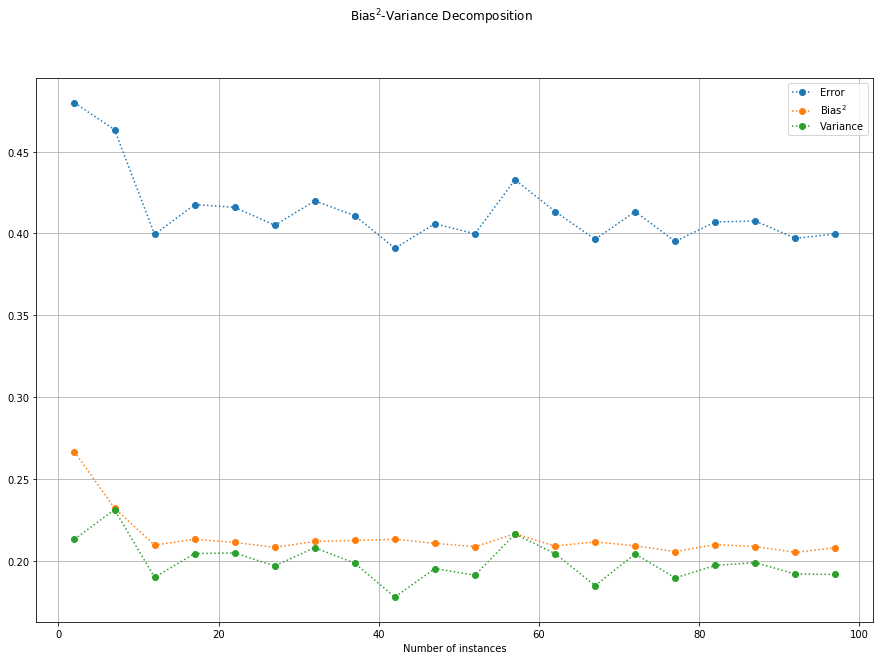

In [8]:
from sklearn.tree import DecisionTreeClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'], 
                                                             max_features = tree_best_features['max_features']))

# IL BIAS e LA VARIANZA SONO PIUTTOSTO BASSI PER L'ALBERO CHE ABBIAMO COSTRUITO

Estimators: 50 - Train Accuracy: 0.718 - Validation Accuracy: 0.693 
Estimators: 75 - Train Accuracy: 0.718 - Validation Accuracy: 0.694 
Estimators: 100 - Train Accuracy: 0.718 - Validation Accuracy: 0.694 
Estimators: 125 - Train Accuracy: 0.718 - Validation Accuracy: 0.693 
Estimators: 150 - Train Accuracy: 0.718 - Validation Accuracy: 0.694 
Estimators: 175 - Train Accuracy: 0.718 - Validation Accuracy: 0.694 
Estimators: 200 - Train Accuracy: 0.719 - Validation Accuracy: 0.693 
Estimators: 225 - Train Accuracy: 0.718 - Validation Accuracy: 0.694 
Estimators: 250 - Train Accuracy: 0.718 - Validation Accuracy: 0.693 
Estimators: 275 - Train Accuracy: 0.717 - Validation Accuracy: 0.693 
Estimators: 300 - Train Accuracy: 0.718 - Validation Accuracy: 0.693 
Best Number of Estimators 75


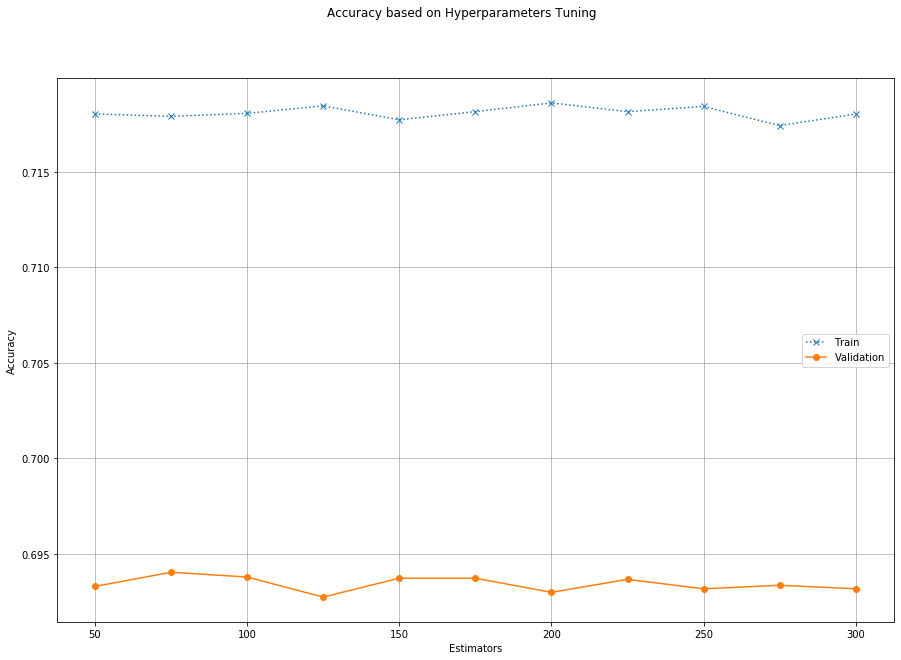

In [74]:
'''
from sklearn.ensemble import BaggingClassifier



def get_best_bagged_tree_n_estimators():
    
    fig, ax = plt.subplots(figsize = (15,10))
    fig.suptitle("Accuracy based on Hyperparameters Tuning")
    
    dt = tree.DecisionTreeClassifier(max_depth = tree_best_features['depth'], 
                                     max_features = tree_best_features['max_features'])
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                              dataframe['Winner'], 
                                                              test_size = 0.33, 
                                                              stratify = None, shuffle = False)

    accuracies = []

    for n_estimators in range(50,301,25):

        bagged_dt = BaggingClassifier(dt, n_estimators=n_estimators, n_jobs = -1)

        bagged_dt.fit(X_train,y_train)

        train_acc = accuracy_score(y_true=y_train, y_pred=bagged_dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=bagged_dt.predict(X_valid))
        #print ("Estimators: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} ".format(
        #    n_estimators,  train_acc, valid_acc))

        accuracies += [[valid_acc, train_acc, n_estimators]]
        
    plot_estimator_accuracy(ax, accuracies, "Estimators")

    best_n_estimators = max(accuracies)[2]
    print ( "Best Number of Estimators", best_n_estimators)
    return best_n_estimators


bagged_tree_best_n_estimators = get_best_bagged_tree_n_estimators()
'''

Estimators: 50 - Train Accuracy: 0.739 - Validation Accuracy: 0.694 
Estimators: 75 - Train Accuracy: 0.739 - Validation Accuracy: 0.694 
Estimators: 100 - Train Accuracy: 0.739 - Validation Accuracy: 0.693 
Estimators: 125 - Train Accuracy: 0.739 - Validation Accuracy: 0.694 
Estimators: 150 - Train Accuracy: 0.739 - Validation Accuracy: 0.693 
Estimators: 175 - Train Accuracy: 0.739 - Validation Accuracy: 0.694 
Estimators: 200 - Train Accuracy: 0.739 - Validation Accuracy: 0.693 
Estimators: 225 - Train Accuracy: 0.739 - Validation Accuracy: 0.693 
Estimators: 250 - Train Accuracy: 0.739 - Validation Accuracy: 0.694 
Estimators: 275 - Train Accuracy: 0.739 - Validation Accuracy: 0.693 
Estimators: 300 - Train Accuracy: 0.739 - Validation Accuracy: 0.694 
Best Number of Estimators 75


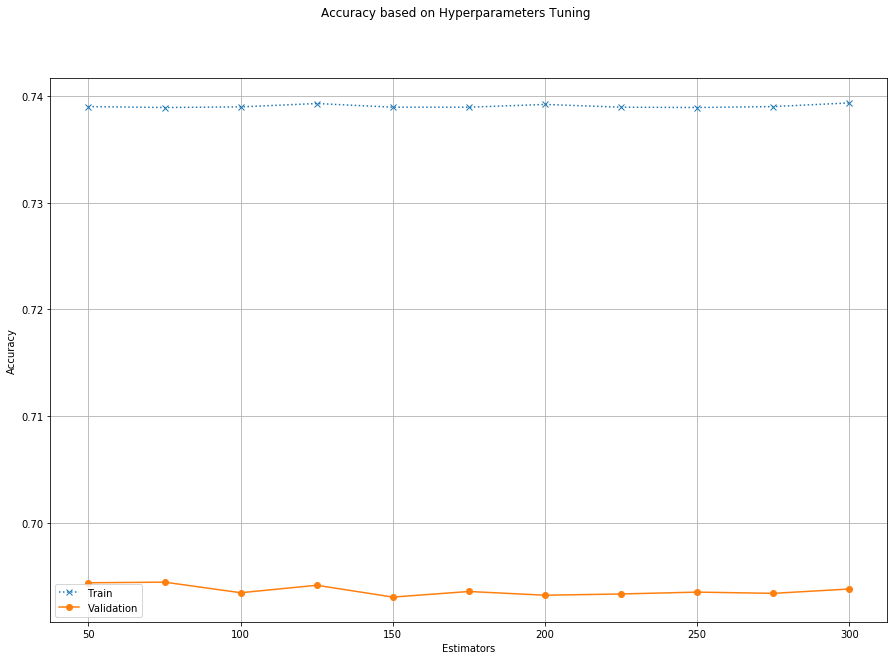

In [4]:
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

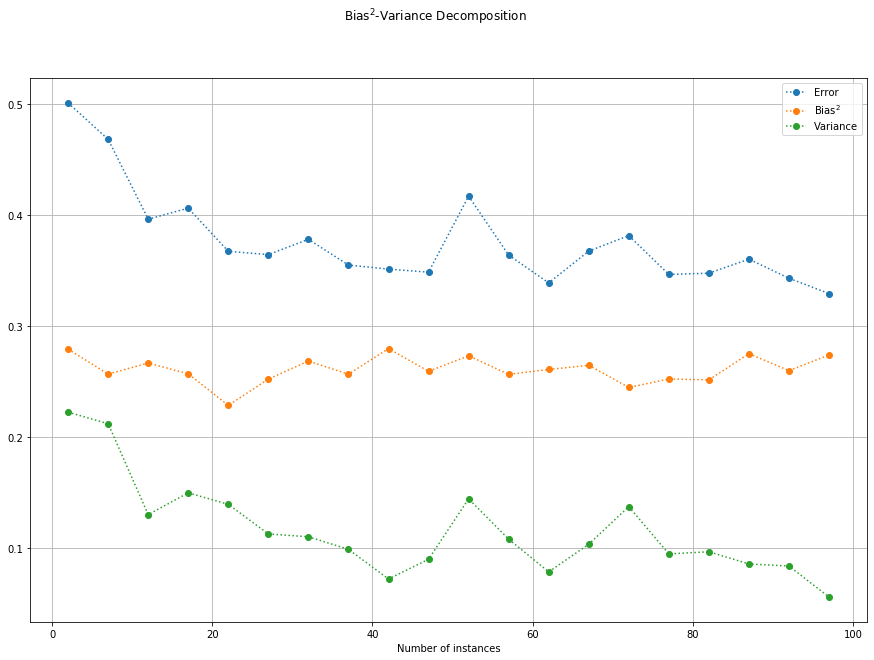

In [9]:
from sklearn.ensemble import BaggingClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    BaggingClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=bagged_tree_best_n_estimators, n_jobs = -1), N_TESTS = 3)

#IL BAGGING RIDUCE UN PO' LA VARIANZA, MA PARE AUMENTARE IL BIAS

Estimators:  1 - Train Accuracy: 0.715 - Validation Accuracy: 0.693 
Estimators:  2 - Train Accuracy: 0.712 - Validation Accuracy: 0.693 
Estimators:  3 - Train Accuracy: 0.719 - Validation Accuracy: 0.692 
Estimators:  4 - Train Accuracy: 0.724 - Validation Accuracy: 0.689 
Estimators:  5 - Train Accuracy: 0.728 - Validation Accuracy: 0.690 
Estimators:  6 - Train Accuracy: 0.728 - Validation Accuracy: 0.692 
Estimators:  7 - Train Accuracy: 0.727 - Validation Accuracy: 0.689 
Estimators:  8 - Train Accuracy: 0.731 - Validation Accuracy: 0.687 
Estimators:  9 - Train Accuracy: 0.730 - Validation Accuracy: 0.688 
Estimators: 10 - Train Accuracy: 0.732 - Validation Accuracy: 0.688 
Estimators: 11 - Train Accuracy: 0.733 - Validation Accuracy: 0.687 
Estimators: 12 - Train Accuracy: 0.732 - Validation Accuracy: 0.688 
Estimators: 13 - Train Accuracy: 0.737 - Validation Accuracy: 0.687 
Estimators: 14 - Train Accuracy: 0.734 - Validation Accuracy: 0.685 
Estimators: 15 - Train Accuracy: 0

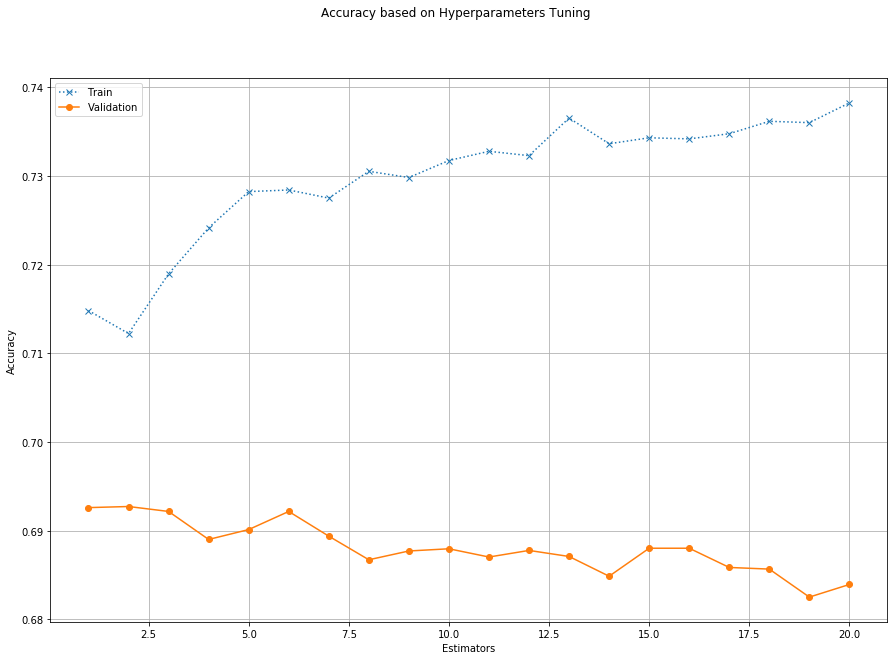

In [84]:
from sklearn.ensemble import AdaBoostClassifier

def get_best_boosted_tree_n_estimators():
    
    fig, ax = plt.subplots(figsize = (15,10))
    fig.suptitle("Accuracy based on Hyperparameters Tuning")
    
    dt = tree.DecisionTreeClassifier(max_depth = tree_best_features['depth'], 
                                     max_features = tree_best_features['max_features'])
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                              dataframe['Winner'], 
                                                              test_size = 0.33, 
                                                              stratify = None, shuffle = False)

    accuracies = []

    for n_estimators in range(1,21):

        boosted_dt = AdaBoostClassifier(dt, n_estimators=n_estimators)

        boosted_dt.fit(X_train,y_train)

        train_acc = accuracy_score(y_true=y_train, y_pred=boosted_dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=boosted_dt.predict(X_valid))
        #print ("Estimators: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} ".format(
        #    n_estimators,  train_acc, valid_acc))

        accuracies += [[valid_acc, train_acc, n_estimators]]
        
    plot_estimator_accuracy(ax, accuracies, "Estimators")

    best_n_estimators = max(accuracies)[2]
    print ( "Best Number of Estimators", best_n_estimators)
    return best_n_estimators


boosted_tree_best_n_estimators = get_best_boosted_tree_n_estimators()

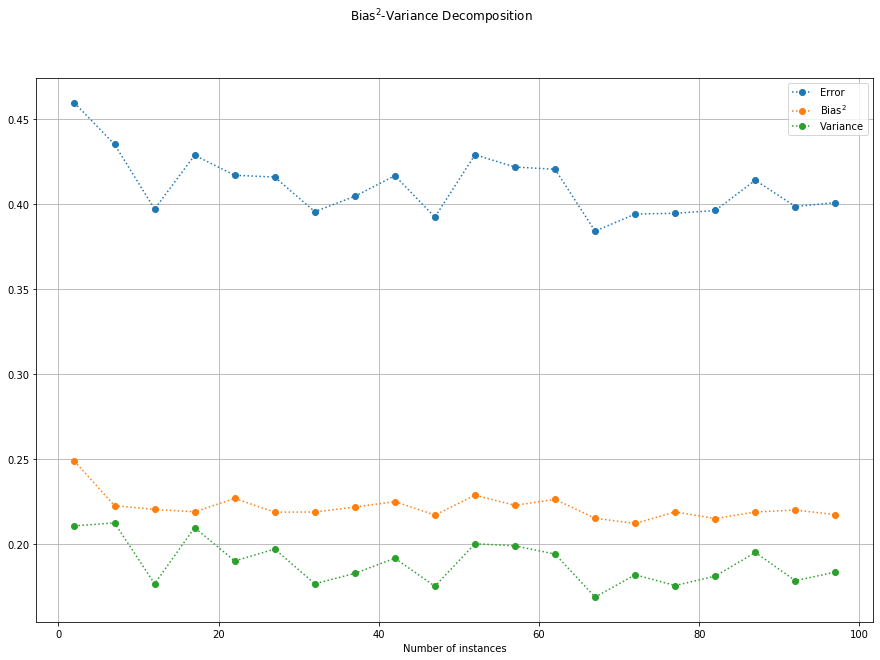

In [85]:
plot_estimator_variance_bias_decomposition(
    AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=boosted_tree_best_n_estimators), N_TESTS = 10)

# LA BIAS RIMANE PIù O MENO INVARIATA, IL TUNING DEGLI IPERPARAMETRI E' STATO EFFICIENTE

	 Estimators: 50 - Validation Accuracy: 0.678
	 Estimators: 75 - Validation Accuracy: 0.682
	 Estimators: 100 - Validation Accuracy: 0.679
	 Estimators: 125 - Validation Accuracy: 0.683
	 Estimators: 150 - Validation Accuracy: 0.682
	 Estimators: 175 - Validation Accuracy: 0.684
	 Estimators: 200 - Validation Accuracy: 0.684
	 Estimators: 225 - Validation Accuracy: 0.684
	 Estimators: 250 - Validation Accuracy: 0.683
	 Estimators: 275 - Validation Accuracy: 0.683
	 Estimators: 300 - Validation Accuracy: 0.683
Best Estimators Number 225
	 Depth:  2 - Validation Accuracy: 0.693
	 Depth:  3 - Validation Accuracy: 0.695
	 Depth:  4 - Validation Accuracy: 0.693
	 Depth:  5 - Validation Accuracy: 0.694
	 Depth:  6 - Validation Accuracy: 0.694
	 Depth:  7 - Validation Accuracy: 0.693
	 Depth:  8 - Validation Accuracy: 0.694
	 Depth:  9 - Validation Accuracy: 0.693
	 Depth: 10 - Validation Accuracy: 0.693
	 Depth: 11 - Validation Accuracy: 0.694
	 Depth: 12 - Validation Accuracy: 0.692
	 Depth

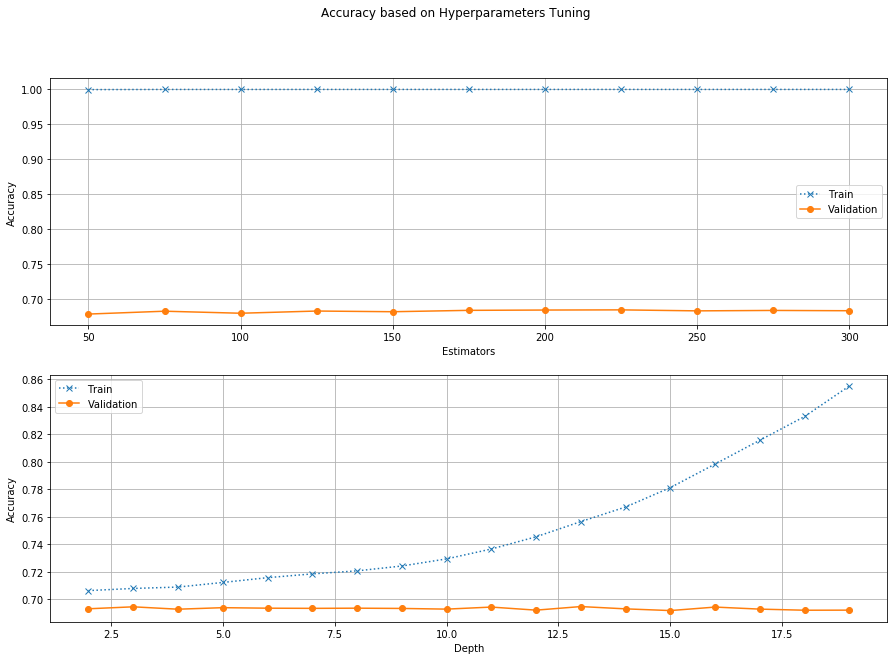

In [88]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def tune_forest_estimators(ax):
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                              dataframe['Winner'], 
                                                              test_size = 0.33, 
                                                              stratify = None, shuffle = False)
    
    accuracies = []
    
    
    
    for estimators in range(50,301,25):
        rf = RandomForestClassifier(n_estimators=estimators, n_jobs = -1) # Traininig su più core n_jobs -1
        rf.fit(X_train,y_train)

        # compute Accuracy
        train_acc = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies += [[valid_acc, train_acc, estimators]]
        #print ("\t Estimators: {:2d} - Validation Accuracy: {:.3f}".format(
        #    estimators, valid_acc))

    plot_estimator_accuracy(ax, accuracies, "Estimators")
    
    best_estimators = max(accuracies)[2]
    print ( "Best Estimators Number", best_estimators)
    return best_estimators


def tune_forest_depth(ax, n_estimators):
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                              dataframe['Winner'], 
                                                              test_size = 0.33, 
                                                              stratify = None, shuffle = False)
    
    accuracies = []
    
    
    
    for max_depth in range(2,20):
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, n_jobs = -1) # Traininig su più core n_jobs -1
        rf.fit(X_train,y_train)

        # compute Accuracy
        train_acc = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies += [[valid_acc, train_acc, max_depth]]
        #print ("\t Depth: {:2d} - Validation Accuracy: {:.3f}".format(
        #    max_depth, valid_acc))

    plot_estimator_accuracy(ax, accuracies, "Depth")
    best_depth = max(accuracies)[2]
    print ( "Best Depth", best_depth)
    return best_depth



def validate_forest_classifier():
    fig, ax = plt.subplots(2, figsize = (15,10))
    fig.suptitle("Accuracy based on Hyperparameters Tuning")
    
    hyper_parameters = {}
    hyper_parameters['n_estimators'] = tune_forest_estimators(ax[0])
    hyper_parameters['max_depth'] = tune_forest_depth(ax[1], n_estimators = hyper_parameters['n_estimators'])
    return hyper_parameters
    
forest_best_features = validate_forest_classifier()
    
    
# Max Features lasciato perdere perché inutile

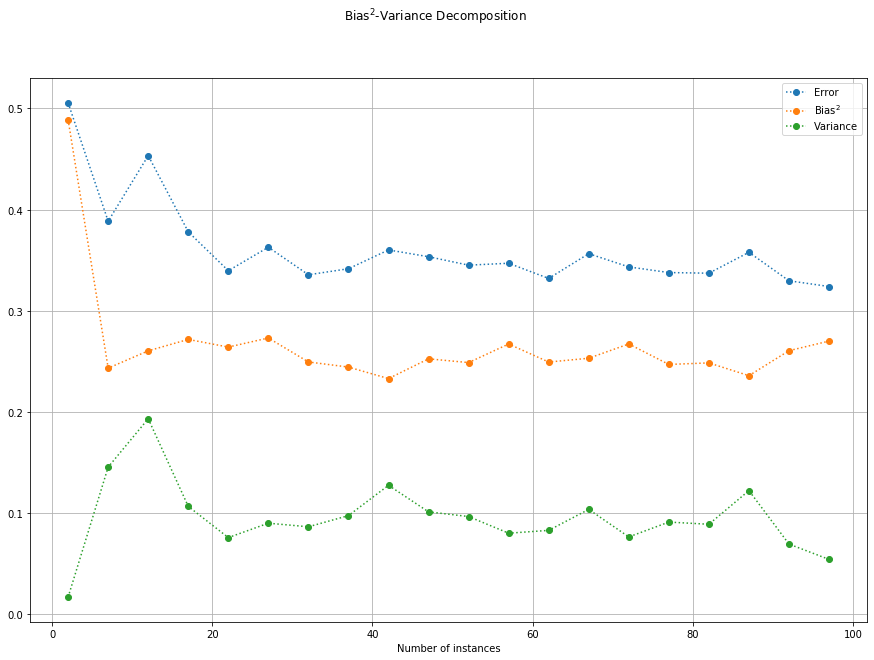

In [90]:
plot_estimator_variance_bias_decomposition(RandomForestClassifier(n_estimators = forest_best_features['n_estimators']),
                                                                  N_TESTS = 3)

# LA BIAS CRESCE DI POCO, FORSE QUESTO PORTA AD UN PEGGIORAMENTO DELL'ACCURATEZZA

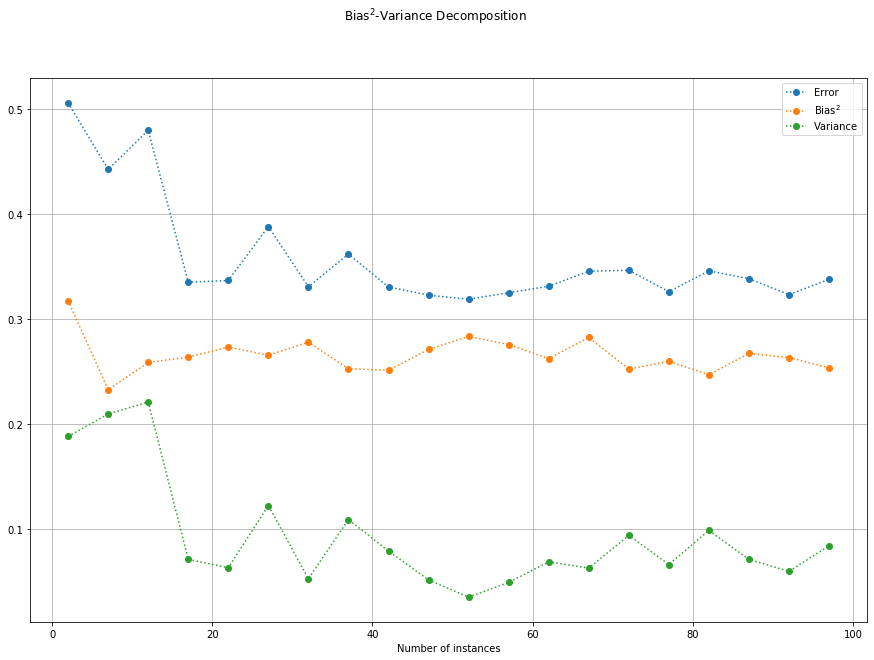

In [91]:
plot_estimator_variance_bias_decomposition(RandomForestClassifier(n_estimators = forest_best_features['n_estimators'],
                                                                 max_depth = forest_best_features['max_depth']),
                                                                  N_TESTS = 3)

# LA FORESTA COL TUNING DEI PARAMETRI PORTA AD UN RISULTATO SIMILE RISPETTO ALL'ALBERO, PROBABILMENTE PERCHé LA BIAS CRESCE UN PO'
# MENTRE LA VARIANZA DIMINUISCE

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lb

#Accuracy validation with a random forest classifier

def getRandomForestPrediction (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    accuracies_valid = []
    
    
    
    for i in range(50,301,50):
        rf = RandomForestClassifier(n_estimators=i, n_jobs = -1, max_depth = 5) # Traininig su più core n_jobs -1
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies_valid += [valid_acc]
        print ("\t Estimators: {:2d} - Validation Accuracy: {:.3f}".format(
            i, valid_acc))

getRandomForestPrediction()

# min sample split minimo numero di istanze per continuare a splittare
# min impurity decrease
# gridsearch per tunare gli iperparametri

	 Estimators: 50 - Validation Accuracy: 0.687
	 Estimators: 100 - Validation Accuracy: 0.686
	 Estimators: 150 - Validation Accuracy: 0.685
	 Estimators: 200 - Validation Accuracy: 0.686
	 Estimators: 250 - Validation Accuracy: 0.686
	 Estimators: 300 - Validation Accuracy: 0.686


In [19]:
import graphviz 
import os

dt = tree.DecisionTreeClassifier(max_depth= 5)
dt.fit(X_train,y_train)

# COMMENTO DA AGGIUNGERE SEMPRE PER USAR GRAPHVIZ
os.environ["PATH"] += os.pathsep + 'C:/Users/ricca/Anaconda3/Graphviz/release/bin/'


f_names = ["Feature 1", "Feature 2"]

c_names = ["Class 0","Class 1"]

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=dataframe.loc[:, dataframe.columns != 'Winner'].columns, class_names=['0','1'],  
                                filled=True, rounded=True, special_characters=True)  


graph = graphviz.Source(dot_data)
graph

NameError: name 'X_train' is not defined

In [ ]:
dt.tree_.node_count

In [ ]:
#Feature Importance

def getPredImportance (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    rf = RandomForestClassifier(n_estimators=250)
    rf.fit(X_train,y_train)

    return rf.feature_importances_

featImp = getPredImportance()

In [ ]:
#Print feature importance

for (j,k) in sorted((e,i) for i,e in enumerate(featImp)):
    print(dataframe.columns[k])

In [ ]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

In [ ]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))